# Tutorial 2 - Regression Models

## Overview

Welcome to the **Linear Regression with scikit-learn (sklearn)** tutorial! In this guide, you will learn the fundamentals of linear regression and how to implement it using one of the most popular Python libraries for machine learning - scikit-learn (often abbreviated as sklearn).

## What is Linear Regression?

Linear regression is a simple yet powerful statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It is widely used for tasks like predicting house prices, stock market trends, sales forecasting, and much more. The primary goal of linear regression is to find the best-fitting straight line that minimizes the overall error between the predicted and actual values.

## Scikit-learn

Scikit-learn is a free and open-source machine learning library for Python. It provides simple and efficient tools for data mining and data analysis and is built on top of other popular Python libraries like NumPy, SciPy, and Matplotlib. Scikit-learn offers a wide range of machine learning algorithms and utilities, making it an excellent choice for beginners and experienced data scientists alike.

## Prerequisites

Before diving into this tutorial, make sure you have a basic understanding of Python programming and some familiarity with data manipulation and visualization. Knowledge of NumPy and Pandas will be beneficial but not mandatory, as we will provide explanations along the way.

To follow along with the code examples, you'll need to have scikit-learn installed. If you don't have it already, you can install it using `pip`:

```python
pip install scikit-learn
```

# Multivariable Linear Regression Using Formulation

- `X` is our feature matrix, where each row represents a data point, and each column represents a feature. The first column consists of all ones, which is necessary to account for the bias term in the linear regression equation. The remaining columns are the features (independent variables) for each data point.
- `y`: This is our target array, which contains the corresponding target values (dependent variable) for each data point. We reshape it to a column vector using reshape(-1, 1) to ensure that it is a 2-dimensional array.
- `X.T`: This gives the transpose of matrix `X`, swapping rows and columns. Transposing `X` is required for the matrix multiplication later on.
- `X.T @ X`: This is the product of `X` transpose and `X`, resulting in a square matrix.
- `np.linalg.inv()`: This function computes the inverse of a matrix. In this case, it calculates the inverse of the square matrix `X.T @ X`.
- `X.T @ X` is usually an invertible matrix for well-behaved data, meaning it has a valid inverse.

After obtaining the inverse of X.T @ X, we continue with the calculation:

- `np.linalg.inv(X.T @ X) @ X.T`: This gives us the product of the inverse of `X.T @ X` and `X.T`, resulting in a new matrix.
- `w = np.linalg.inv(X.T @ X) @ X.T @ y`: Finally, we multiply the new matrix with y (the target values) to get the weights w.

In [1]:
import numpy as np

In [2]:
# define the data
X = np.array([[1, 1, 2, 3], [1, 2, 3, 5], [1, 4, 3, -1], [1, 8, 6, 4]])
y = np.array([4, 8, 5, 10]).reshape(-1, 1)
#! reshape: first parameter limits the number of rows (-1 means it is unlimited), second parameter is the column weidth.
print("x is",X.T)
print("y is",y)
print("y is",X.T @ X)

x is [[ 1  1  1  1]
 [ 1  2  4  8]
 [ 2  3  3  6]
 [ 3  5 -1  4]]
y is [[ 4]
 [ 8]
 [ 5]
 [10]]
y is [[ 4 15 14 11]
 [15 85 68 41]
 [14 68 58 42]
 [11 41 42 51]]


In [3]:
w = np.linalg.inv(X.T@X)@X.T @ y
# ! .inv is a function to obtain the inverse of the function.
# this line of code obtains the parameter W according to the lecture
w

array([[-16.5 ],
       [ -9.75],
       [ 19.25],
       [ -2.75]])

In [4]:
print('w1~n is', w[1:].flatten())
print('w0 is', w[0])
# ! W0 is intercept and W1 is the slope 

w1~n is [-9.75 19.25 -2.75]
w0 is [-16.5]


# Multivariable Linear Regression Using Scikit-learn

First we import the LinearRegression class from the linear_model module of scikit-learn. LinearRegression is a class that represents the linear regression model. Scikit-learn is a powerful machine learning library that provides a wide range of algorithms, and in this case, we are using its linear regression implementation.


```python
reg = LinearRegression().fit(X, y)
```
- In this line, we create an instance of the `LinearRegression` class and then fit the model to our data. Fitting the model means finding the optimal values for the weights (coefficients) and the bias term (intercept) using the provided data.
- Scikit-learn's `fit` method takes the feature matrix X and target array y as arguments and calculates the optimal weights for the linear regression model using the Ordinary Least Squares (OLS) method.

```python
print('w1 is', reg.coef_)
print('w0 is', reg.intercept_)
```
- `reg.coef_`: This attribute contains an array of coefficients (weights) learned by the model. Each element of the array corresponds to the weight of the corresponding feature in `X`.
- `reg.intercept_`: This attribute contains the bias term (intercept) learned by the model. It represents the value of the target variable when all feature values are zero.

The code then prints the values of reg.coef_ and reg.intercept_, which correspond to the weights and bias term of the fitted linear regression model.


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# define the data
X = np.array([[1, 2, 3], [2, 3, 5], [4, 3, -1], [8, 6, 4]])
y = np.array([4, 8, 5, 10])

In [7]:
reg = LinearRegression().fit(X, y)
# ! this is the complete linear regressison training function.
print('w1 is', reg.coef_)
print('w0 is', reg.intercept_)


w1 is [-9.75 19.25 -2.75]
w0 is -16.4999999999999


# Polynomial Regression Using Scikit-learn

This part imports the required libraries, `matplotlib.pyplot` for data visualization and `pandas` for data manipulation.

```python
FD_data = pd.read_csv('FD_data.csv')
```
- In this line, you are reading data from a CSV file named 'FD_data.csv' and storing it in a Pandas DataFrame called FD_data. The pd.read_csv() function is used to read data from a CSV file and create a DataFrame from it. CSV files are commonly used to store tabular data.

```python
k = FD_data['k'].to_numpy().reshape(-1, 1)
q = FD_data['q'].to_numpy().reshape(-1, 1)
```

- In these two lines, you are extracting the 'k' and 'q' columns from the FD_data DataFrame and converting them into NumPy arrays. The to_numpy() method converts the columns into NumPy arrays, and reshape(-1, 1) reshapes them into a column vector.
- These operations are done because the plt.plot() function expects the data for the x-axis and y-axis to be in NumPy arrays, and it's common to reshape them into column vectors when plotting data points.

```python
plt.plot(k, q, '.')
```

- This line creates a scatter plot using the plt.plot() function. The 'k' values are plotted on the x-axis, and the 'q' values are plotted on the y-axis. The '.' argument specifies that we want to use dots to represent the data points.
- The scatter plot helps visualize the relationship between 'Density' ('k') and 'Flow' ('q') in the data. It shows how the flow ('q') changes as the density ('k') of vehicles on the road varies.




In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# load the data
FD_data = pd.read_csv('FD_data.csv')
# show the data
print(FD_data.head())

# k and q are in the shape: [n_samples, n_features]
k = FD_data['k'].to_numpy().reshape(-1, 1)
q = FD_data['q'].to_numpy().reshape(-1, 1)

# print(k[:10])
# print(q[:10])


    k    q
0  21  538
1   6  291
2   8  397
3   5  197
4   9  379


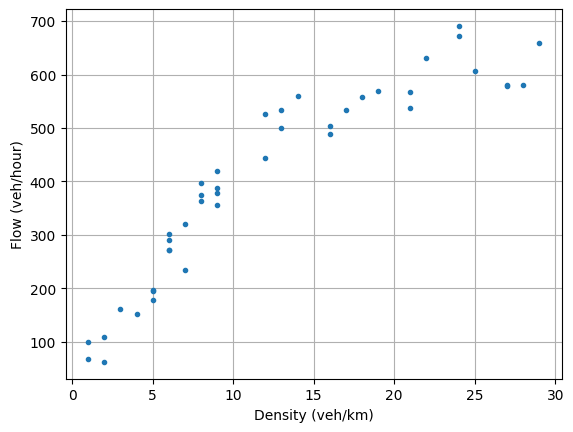

In [10]:
plt.plot(k, q, '.')
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')
plt.grid()

## PolynomialFeatures

This part imports the `PolynomialFeatures` class from the `preprocessing` module of scikit-learn. The `PolynomialFeatures` class is used for feature engineering in polynomial regression. It generates polynomial features from the original features.

```python
poly = PolynomialFeatures(degree=2, include_bias=False)
```

Here, you create an instance of the `PolynomialFeatures` class. The `degree` parameter specifies the degree of the polynomial features to be generated. In this case, `degree=2` means we want to create second-degree polynomial features (quadratic features). The `include_bias=False` parameter tells the class not to include a bias column of 1s in the output. The bias column is typically used to account for the intercept term, but since we already have included it in the original data, we set `include_bias=False`.

```python
poly_features = poly.fit_transform(k)
```
- In this line, you transform the 'k' data using the `fit_transform()` method of the `PolynomialFeatures` object `poly`. The `fit_transform()` method takes the original data (in this case, 'k') and generates polynomial features based on the specified degree.
- The output `poly_features` will be a new array containing the original 'k' values along with their corresponding polynomial features up to the second degree. For example, if 'k' had three original values `[x1, x2, x3]`, `poly_features` will contain `[x1, x1^2, x2, x2^2, x3, x3^2]`.


In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)
# ! Degree 2 means that the paraeter can be generated as x and x^2
poly_features = poly.fit_transform(k)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# we do this because polynomial regression is linear
# ! the training dataset and testing dataset are not separated.
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, q)
# predicted from fitted model
y_predicted = poly_reg_model.predict(poly_features)
FD_data['Fitted'] = y_predicted
# FD_data.head()

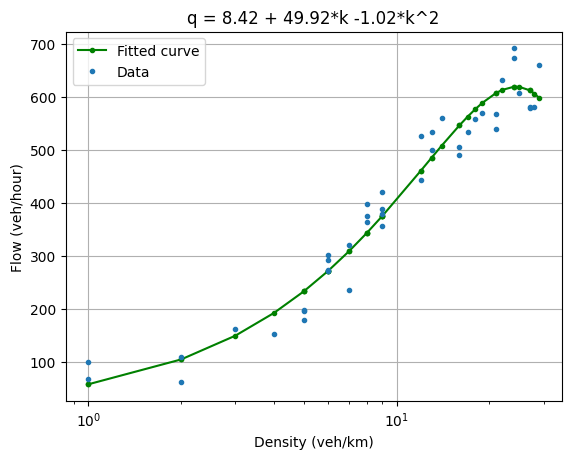

In [31]:
FD_data = FD_data.sort_values(by='k')
## plot the predicted data
plt.plot(FD_data['k'], FD_data['Fitted'], 'g.-', label='Fitted curve')
plt.plot(FD_data['k'], FD_data['q'], '.', label='Data')
plt.legend(loc=0)
plt.xlabel('Density (veh/km)')
plt.ylabel('Flow (veh/hour)')
plt.title('q = %.2f + %.2f*k %.2f*k^2'%(
    poly_reg_model.intercept_[0], poly_reg_model.coef_[0, 0], poly_reg_model.coef_[0, 1]
))
plt.grid()

# Ridge regression

## Data Preparation


First, we'll load the data and perform some preprocessing steps:

- We use `pd.read_csv()` to load data from 'data_X.csv' into a Pandas DataFrame, `data_BART_sld`, containing information for the first 48 stations.
- Next, we use `np.load()` to load daily ridership data from '3d_daily.npy' into a 2D array. We then extract the total ridership data from Embarcadero station to the first 48 stations, which will be our target variable, `OD_BART`.

In [16]:
from sklearn import linear_model
from sklearn.preprocessing import minmax_scale
#! this fits your data into a range between [0,1]

In [17]:
# take the first 48 stations becasue the 
# last 2 stations were not yet opened
# by the time this data was collected
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, 1:]
data_BART_sld.head()

,TotPop,AutoOwn0,TotEmp,Tot Rd Dens
0,11084,1664,33120,42.232657
1,142973,20505,103479,32.296762
2,36177,4704,47570,31.822631
3,104191,8018,39663,32.894203
4,70630,1142,13924,20.531431


In [18]:
# the file "3d_daily.npy" contains the daily ridership
# data from each station to all the other stations
# its shape is [50, 50, 365]. Each dimension represents
# origin, destination, number of day in the year respectively

# Embarcadero is the 18th station in the list
OD_BART = np.load('3d_daily.npy').sum(axis=2)[17, :48]
OD_BART[:10]

array([371017., 338886., 405647., 451633., 105476., 197569., 367780.,
       190456., 143052., 173979.])

In [19]:
print('Shape of data_BART_sld', data_BART_sld.shape)
print('Shape of OD_BART', OD_BART.shape)

Shape of data_BART_sld (48, 4)
Shape of OD_BART (48,)


## Ridge Regression Function

We define a function, get_w(alpha), to perform Ridge Regression with varying alpha values:

- Inside `get_w(alpha)`, we perform feature scaling on `X` and `y` using `minmax_scale`.
- We create a `Ridge` regression model, `reg`, with the specified `alpha` value.
- The model is fitted to the scaled data using `fit()`.
- The function returns the intercept and coefficients of the fitted Ridge model.

In [20]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X, y)
    
    return reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]

## Calculate Coefficients for Varying Alpha

Next, we calculate the coefficients for varying alpha values using a loop:

- We create empty lists `(intercept_set, coef1_set, etc.)` to store the intercept and coefficient values for different alpha values.
- We define an array `alpha_set` ranging from 0 to 1 (inclusive) with a step of 0.05.
- We use a for loop to calculate the coefficients for each alpha value using the `get_w(alpha)` function. The coefficients are then appended to their respective lists.

In [21]:
intercept_set = []
coef1_set = []
coef2_set = []
coef3_set = []
coef4_set = []

alpha_set = np.arange(0, 1.05, 0.05)
# ! presets the alpha value.

for alpha in alpha_set:
    intercept, coef1, coef2, coef3, coef4 = get_w(alpha)
    intercept_set.append(intercept)
    coef1_set.append(coef1)
    coef2_set.append(coef2)
    coef3_set.append(coef3)
    coef4_set.append(coef4)
    

## Visualizing Coefficients vs. Alpha

Finally, we visualize the coefficients against different alpha values using Matplotlib:

- We use `plt.plot()` to plot each coefficient value against `alpha_set`. The arguments `'b.-'`, `'r.-'`, etc., specify the line style, marker style, and color for each plot.
- `plt.grid()` adds a grid to the plot for better readability.
- `plt.legend()` adds a legend to the plot to identify each coefficient.
- `plt.xlabel()` and `plt.ylabel()` set the labels for the x-axis and y-axis, respectively.

## <span style="color: red"> We can see below that as alpha increase: 1) the coefficients for the parameters decreases, 2) intercept increases </span>

Text(0, 0.5, 'Coefficient')

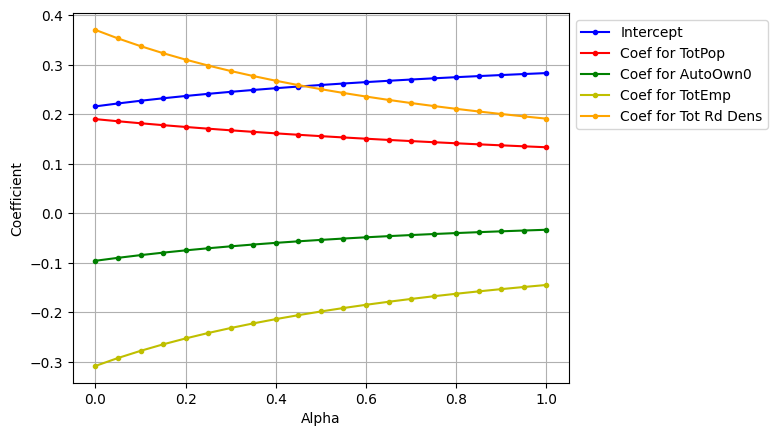

In [22]:
plt.plot(alpha_set, intercept_set, 'b.-', label='Intercept')
plt.plot(alpha_set, coef1_set, 'r.-', label='Coef for TotPop')
plt.plot(alpha_set, coef2_set, 'g.-', label='Coef for AutoOwn0')
plt.plot(alpha_set, coef3_set, 'y.-', label='Coef for TotEmp')
plt.plot(alpha_set, coef4_set, '.-', color='orange', label='Coef for Tot Rd Dens')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Alpha')
plt.ylabel('Coefficient')



# LASSO regression

The following code of some other regression methods are similar to Ridge regression, you can learn it referring to the above explanations.

In [23]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    reg = linear_model.Lasso(alpha=alpha)
    reg.fit(X, y)
    
    return reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]

In [24]:
intercept_set = []
coef1_set = []
coef2_set = []
coef3_set = []
coef4_set = []

alpha_set = np.arange(0, 0.05, 0.001)
for alpha in alpha_set:
    intercept, coef1, coef2, coef3, coef4 = get_w(alpha)
    intercept_set.append(intercept)
    coef1_set.append(coef1)
    coef2_set.append(coef2)
    coef3_set.append(coef3)
    coef4_set.append(coef4)
    

/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+00, tolerance: 2.443e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

Text(0, 0.5, 'Coefficient')

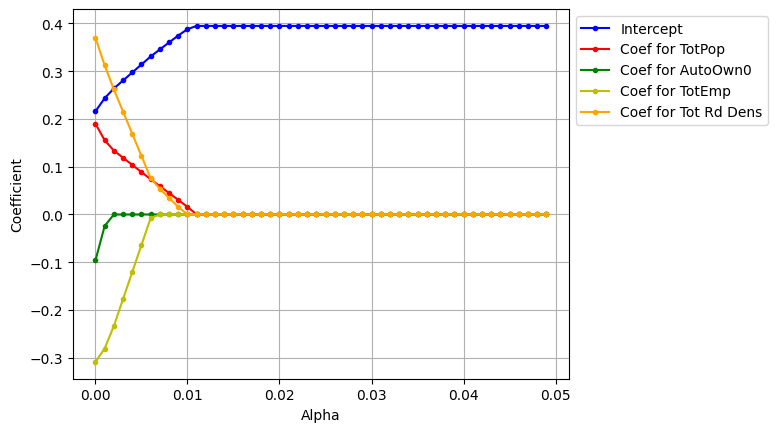

In [25]:
plt.plot(alpha_set, intercept_set, 'b.-', label='Intercept')
plt.plot(alpha_set, coef1_set, 'r.-', label='Coef for TotPop')
plt.plot(alpha_set, coef2_set, 'g.-', label='Coef for AutoOwn0')
plt.plot(alpha_set, coef3_set, 'y.-', label='Coef for TotEmp')
plt.plot(alpha_set, coef4_set, '.-', color='orange', label='Coef for Tot Rd Dens')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Alpha')
plt.ylabel('Coefficient')

# Elastic Net regression

In [26]:
def get_w(alpha):
    X = minmax_scale(data_BART_sld)
    y = minmax_scale(OD_BART)

    # Write your code here
    
    # reg = ...
    reg = linear_model.ElasticNet(alpha=alpha)
    
    
    # Your code ends
    
    reg.fit(X, y)
    
    return reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3]

In [27]:
intercept_set = []
coef1_set = []
coef2_set = []
coef3_set = []
coef4_set = []

alpha_set = np.arange(0, 0.05, 0.001)
for alpha in alpha_set:
    intercept, coef1, coef2, coef3, coef4 = get_w(alpha)
    intercept_set.append(intercept)
    coef1_set.append(coef1)
    coef2_set.append(coef2)
    coef3_set.append(coef3)
    coef4_set.append(coef4)
    

/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/felixlaw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+00, tolerance: 2.443e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

Text(0, 0.5, 'Coefficient')

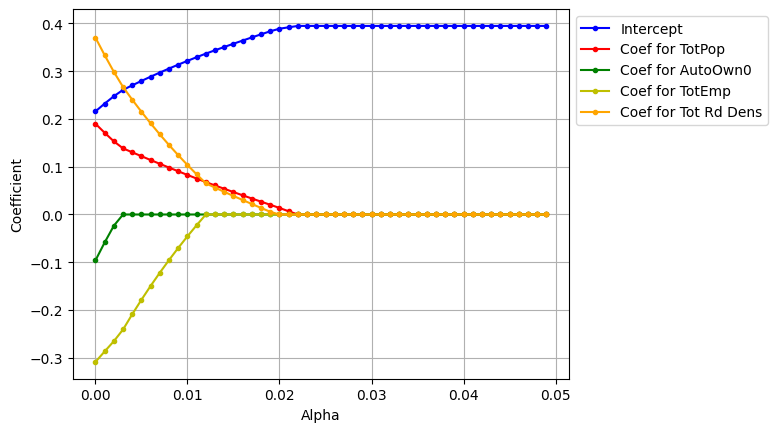

In [28]:
plt.plot(alpha_set, intercept_set, 'b.-', label='Intercept')
plt.plot(alpha_set, coef1_set, 'r.-', label='Coef for TotPop')
plt.plot(alpha_set, coef2_set, 'g.-', label='Coef for AutoOwn0')
plt.plot(alpha_set, coef3_set, 'y.-', label='Coef for TotEmp')
plt.plot(alpha_set, coef4_set, '.-', color='orange', label='Coef for Tot Rd Dens')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Alpha')
plt.ylabel('Coefficient')